In [1]:
import numpy as np
import pandas as pd

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.sample(10)

ID_code  target    var_0   var_1    var_2    var_3    var_4  \
122621  train_122621       0  12.0491 -7.0028   9.0716  10.3694  12.2490   
144241  train_144241       0   7.9432  2.4133  10.1468   9.1550  10.6356   
148240  train_148240       0  12.9009  0.6602  12.1627   5.0232   8.0779   
64525    train_64525       0   7.2256 -0.5336  11.2970   5.5276  12.0318   
178891  train_178891       0   9.1930 -6.5772  11.5113   5.0550  13.1144   
123371  train_123371       0  12.4572  0.3020   6.9561   7.3420  12.7688   
162368  train_162368       0   9.6538  1.8601  10.9755   8.4495  13.3158   
104346  train_104346       0  12.6621 -2.0571   9.5672   7.2773  10.3517   
155988  train_155988       0   6.2548  4.3188  11.1831   8.3236   8.8464   
54868    train_54868       0  12.4028 -8.2218   8.0572   3.3053   7.3406   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
122621 -15.9904  5.2470  17.6193  ...  10.9129   7.9190   2.6150  -1.9649   
144241  -8.1202  5.5078  13.6651  ...  -1.8538   9.2201   0.7497   6.5343   
148240 -13.2420  6.8571  20.6465  ...   8.3431   8.3763   3.7796   6.0886   
64525  -10.4961  5.4704  14.3664  ...  -6.2287   7.7688   2.4189   2.4253   
178891   3.1770  6.1227  19.4430  ...  -2.4913  13.4913   1.3648   6.9742   
123371   1.7739  5.8250  16.8654  ...   4.5836   7.6542  -0.4363   5.9257   
162368 -12.2606  4.4600  15.8375  ...  10.0245   3.7794   0.3335   5.0607   
104346  -4.3593  6.0030  20.5110  ...  -1.8276   7.6318  -0.0270   3.3340   
155988  -3.5170  5.7660  17.7260  ...   1.0164  10.3184  -0.5946   7.3311   
54868  -10.0187  4.5712  19.5326  ...  11.5792   5.3733  -0.1772   2.4394   

        var_194  var_195  var_196  var_197  var_198  var_199  
122621  13.1059  -0.4304  -7.7653   8.9450  16.0759  -4.6892  
144241  13.3771   2.4565   2.1808   7.3616  15.0498  12.7298  
148240  11.3557   0.9604   4.7937  10.6246  11.5772   5.2403  
64525   21.4043  -0.9988   3.1633   7.3262  21.0219  -7.4645  
178891  18.6040   0.4038   4.5437   9.8407  16.3054   4.6127  
123371  16.7981   0.8790  -3.0182   8.9504  13.8889   0.1293  
162368  15.2022  -2.1258  -5.2260   8.3811  16.8822   0.6992  
104346  11.2789   0.0350  -2.9143   8.3164  17.8826 -23.9232  
155988  19.1000  -0.7003  10.9569  10.2635  14.3588  -4.0218  
54868   17.8158  -1.5103  -1.2694   7.9866  16.8577  -0.7176  

[10 rows x 202 columns]

In [4]:
# Analysis 

train.shape, test.shape

((200000, 202), (200000, 201))

In [5]:
print("columns that are present in train but not in test: ", end=" ")
for i in train.columns:
    if i not in test.columns:
        print(i, end=" ")   

columns that are present in train but not in test:  target 

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
train.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

From initial analysis, I do not see max values to be way too out of bounds for some of the columns, so I don't think there are going to be many outliers. However, I would use an IQR to check for outliers as there are 200 columns and it would be difficult to investigate like this.

Also, I can see skewness exists in almost every variable. We are going to check further using displots.

In [8]:
# drop the ID_code column
train = train.drop('ID_code', axis=1)

In [9]:
train.head()

target    var_0   var_1    var_2   var_3    var_4   var_5   var_6    var_7  \
0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187  18.6266   
1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208  16.5338   
2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427  14.6155   
3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428  14.9250   
4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405  19.2514   

    var_8  ...  var_190  var_191  var_192  var_193  var_194  var_195  var_196  \
0 -4.9200  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   7.8784   
1  3.1468  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   8.1267   
2 -4.9193  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417  -6.5213   
3 -5.8609  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706  -2.9275   
4  6.2654  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   3.9267   

   var_197  var_198  var_199  
0   8.5635  12.7803  -1.0914  
1   8.7889  18.3560   1.9518  
2   8.2675  14.7222   0.3965  
3  10.2922  17.9697  -8.9996  
4   9.5031  17.9974  -8.8104  

[5 rows x 201 columns]

In [10]:
# check duplicates
train.duplicated().sum()

0

NO duplicated samples

In [11]:
# check missing values

train.isnull().sum().values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

NO Null Values

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ahmed\AppData\Local\Temp\ipykernel_680\2981074343.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(train,x='target', palette='dark')


<Axes: xlabel='target', ylabel='count'>

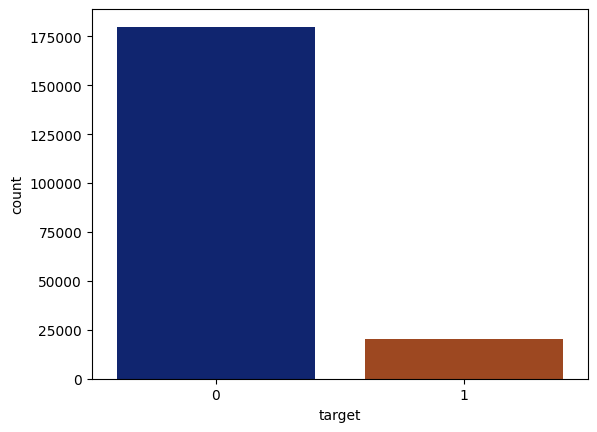

In [13]:
# check imbalance
sns.countplot(train,x='target', palette='dark')

In [14]:
# check imbalance
train['target'].value_counts()


target
0    179902
1     20098
Name: count, dtype: int64

In [15]:
from scipy.stats import norm, skew

In [16]:
# check skeweness
right_skewed, left_skewed, no_skeweness = 0, 0, 0

for col in list(set(train.columns) - set(['target'])):
    if skew(train[col])>0:
        right_skewed+=1        
    elif skew(train[col])==0:
        no_skeweness+=1
    else:
        left_skewed+=1

print("Features that are left skewed are: ", left_skewed)
print("Features that are right skewed are: ", right_skewed)
print("Features that are not skewed are: ", no_skeweness)

Features that are left skewed are:  88
Features that are right skewed are:  112
Features that are not skewed are:  0


Checking For Outliers

In [17]:
import plotly.express as px

fig = px.box(train, y="var_0",
      title="Boxplot for var_0")
fig.update_layout(

    title_font_color="#fff",paper_bgcolor="#000000",title_font_size=20,title_x=.5,font_color="#bbb",
    plot_bgcolor="#D0D3D4")

fig.update_yaxes(showgrid=False,visible=False,title="percent of comments")
fig.update_xaxes(tickfont_size=9)
fig.show()

# Outliers exists.

# Outliers have been removed now.

# Removed datapoints that fall outside 3 s.d 

In [18]:
from scipy import stats

train = train[(np.abs(stats.zscore(train)) < 3).all(axis=1)]
print("New shape after removing outliers:", train.shape)

New shape after removing outliers: (188969, 201)


In [19]:
# drop the target column

X, y = train.drop('target', axis = 1), train ['target']

In [20]:
len(train[train['target'] == 0])/ len(train[train['target'] == 1])

9.037660682035483

In [21]:
# There's a pretty good imbalance.

# For every sample of class 1, 9.03 samples of class 0 are present. We need to deal with class imbalance here.

# I would probably be using tomek links or SMOTE for dealing with it.

Train Test Split

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split( X,y 
                                                    , test_size = 0.20, random_state = 42) 
print("Shape of train data: ", X_train.shape)
print("Shape of test data: ", X_test.shape)

Shape of train data:  (151175, 200)
Shape of test data:  (37794, 200)


Creating a Baseline Model With XGBOOST

In [23]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

In [24]:
xg = XGBClassifier()
xg.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [25]:
print( 'Train roc auc score for ROC: ', roc_auc_score(y_train, xg.predict_proba(X_train)[:, 1]))
print( 'Test roc auc score for ROC: ', roc_auc_score(y_test, xg.predict_proba(X_test)[:, 1]))

Train roc auc score for ROC:  0.9818504309231296
Test roc auc score for ROC:  0.8566740766417029


In [26]:
print(classification_report(y_test, xg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95     34039
           1       0.67      0.25      0.36      3755

    accuracy                           0.91     37794
   macro avg       0.80      0.62      0.66     37794
weighted avg       0.90      0.91      0.89     37794



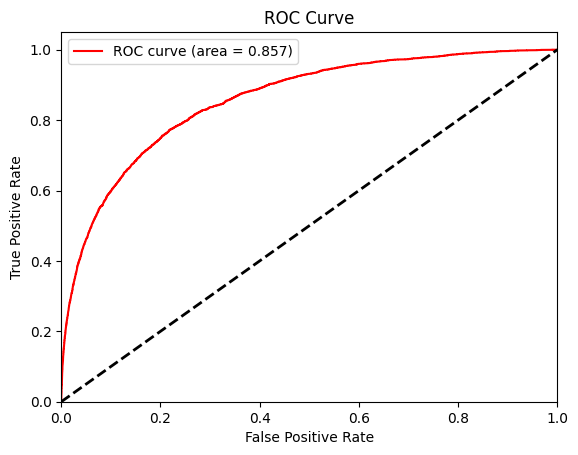

In [27]:
fpr, tpr, _ = roc_curve(y_test, xg.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper left")
plt.show()

In [28]:
from lightgbm import LGBMClassifier

lgb = LGBMClassifier()
lgb.fit(X_train, y_train)


[LightGBM] [Info] Number of positive: 15071, number of negative: 136104
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.135815 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 151175, number of used features: 200
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.099692 -> initscore=-2.200647
[LightGBM] [Info] Start training from score -2.200647


LGBMClassifier()

In [29]:
print( 'Train roc auc score for LGBM: ', roc_auc_score(y_train, lgb.predict_proba(X_train)[:, 1]))
print( 'Test roc auc score for LGBM: ', roc_auc_score(y_test, lgb.predict_proba(X_test)[:, 1]))

Train roc auc score for LGBM:  0.9269114796713921
Test roc auc score for LGBM:  0.866368713352965


In [30]:
print(classification_report(y_test, lgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     34039
           1       0.85      0.10      0.18      3755

    accuracy                           0.91     37794
   macro avg       0.88      0.55      0.56     37794
weighted avg       0.90      0.91      0.87     37794



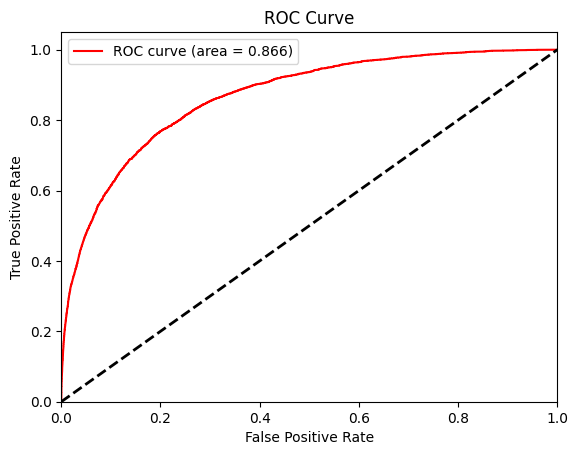

In [31]:
fpr, tpr, _ = roc_curve(y_test, lgb.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='red', label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="upper left")
plt.show()

In [32]:
# calculate f1score

from sklearn.metrics import f1_score

print("F1 score for XGBoost: ", f1_score(y_train, xg.predict(X_train)))
print("F1 score for XGBoost: ", f1_score(y_test, xg.predict(X_test)))
print("F1 score for LightGBM: ", f1_score(y_train, lgb.predict(X_train)))
print("F1 score for LightGBM: ", f1_score(y_test, lgb.predict(X_test)))

F1 score for XGBoost:  0.7604086117781124
F1 score for XGBoost:  0.36278707668353444
F1 score for LightGBM:  0.30551058009044724
F1 score for LightGBM:  0.1770460510617991


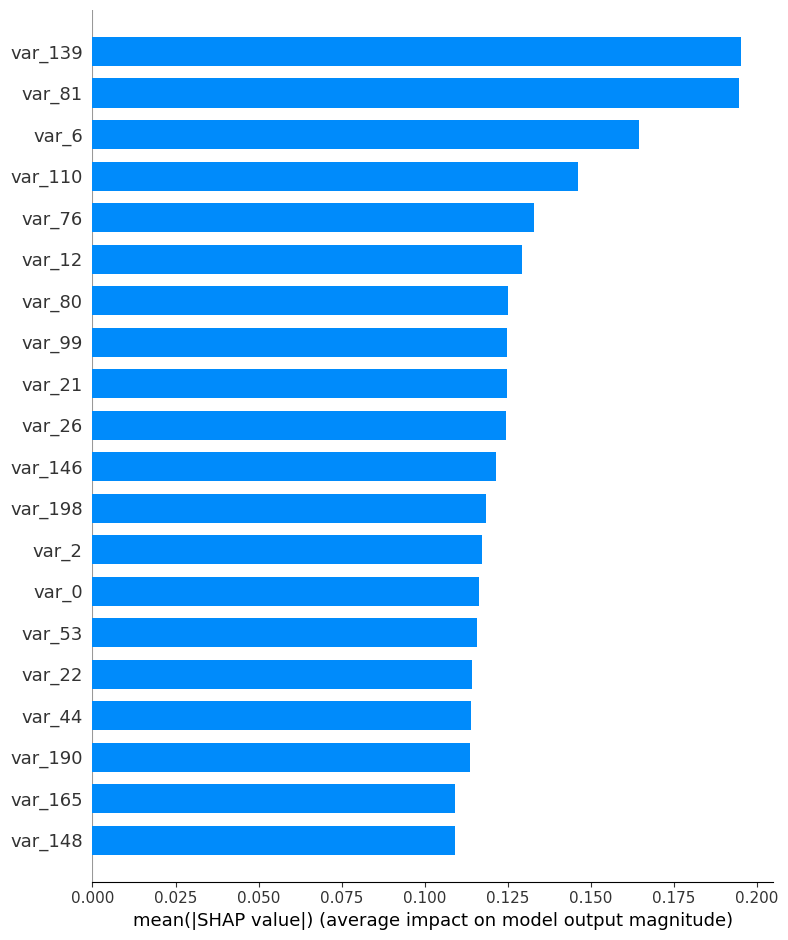

In [34]:
import shap

shap.initjs()

X_shap=X_train.copy()


xg_explainer = shap.TreeExplainer(xg)
xg_shap_values = xg_explainer.shap_values(X_shap)
shap.summary_plot(xg_shap_values, X_shap, plot_type="bar")


c:\Users\ahmed\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\explainers\_tree.py:448: UserWarning:

LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray



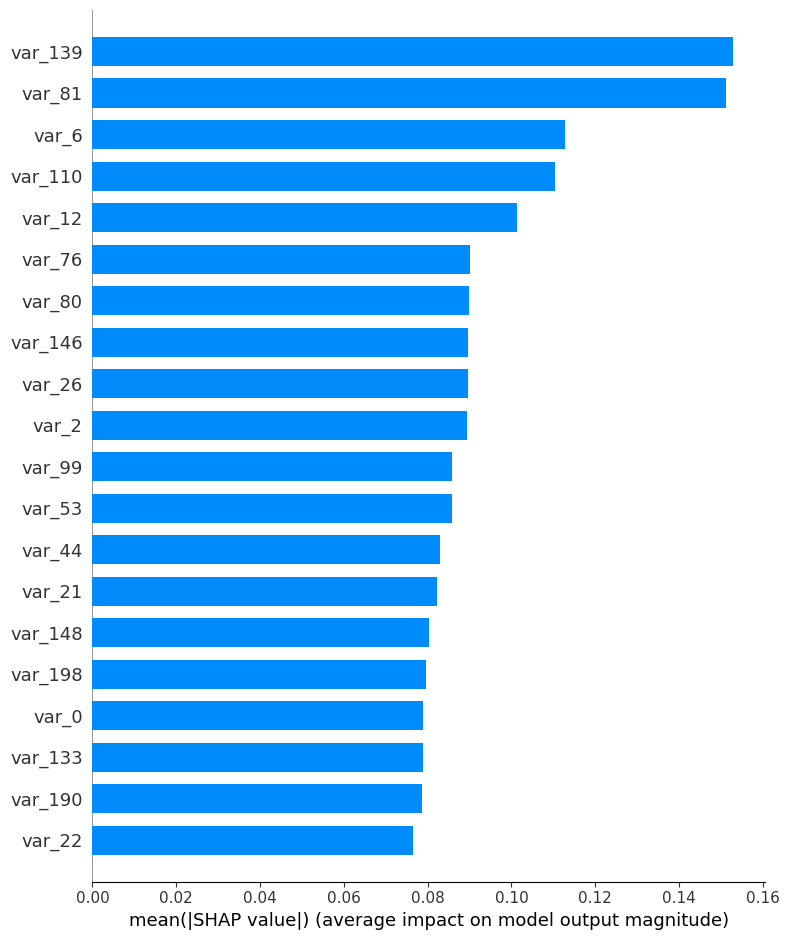

In [35]:
import shap

shap.initjs()

X_shap=X_train.copy()


lgb_explainer = shap.TreeExplainer(lgb)
lgb_shap_values = lgb_explainer.shap_values(X_shap)
shap.summary_plot(lgb_shap_values, X_shap, plot_type="bar")

trying to improve the model

In [36]:
from sklearn.preprocessing import StandardScaler

# scale the data
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

Checking how much variance are different PCA components explaining

In [37]:
from sklearn.decomposition import PCA

for components in range(100, 199):
    pca = PCA(n_components = components)
    pca.fit(X_train)
    print('Explained variance for ', components, 'is: ', sum(pca.explained_variance_ratio_))


#For 160 components, explained variance goes as high as 81.86 which is pretty good. We have dropped down from 199 features.

Explained variance for  100 is:  0.9275665190454212
Explained variance for  101 is:  0.9299789249617237
Explained variance for  102 is:  0.9323550896991584
Explained variance for  103 is:  0.9347227132782164
Explained variance for  104 is:  0.9370034970165635
Explained variance for  105 is:  0.939273265949852
Explained variance for  106 is:  0.9414925773533928
Explained variance for  107 is:  0.943704972157982
Explained variance for  108 is:  0.9456828673450717
Explained variance for  109 is:  0.9476301975600896
Explained variance for  110 is:  0.9494494946209967
Explained variance for  111 is:  0.9511839255967192
Explained variance for  112 is:  0.95281937701379
Explained variance for  113 is:  0.9543937467408172
Explained variance for  114 is:  0.955937736016229
Explained variance for  115 is:  0.9574711025877527
Explained variance for  116 is:  0.9589825927999833
Explained variance for  117 is:  0.9604860540142556
Explained variance for  118 is:  0.9619866469724009
Explained varianc

In [38]:
pca = PCA(n_components = 160)
X_train_PCA = pca.fit_transform(X_train_sc)
X_test_PCA = pca.transform(X_test_sc)

Balancing Data With Random Undersampling and Oversampling

In [39]:
print("Before doing any balancing, the distribution looks like","class 0: ",len(y[y==0]),"class 1: " ,len(y[y==1]))

Before doing any balancing, the distribution looks like class 0:  170143 class 1:  18826


In [42]:
# dealing with class imbalance
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

over = RandomOverSampler(sampling_strategy=1)

print(Counter(y_train))

under = RandomUnderSampler(sampling_strategy=.15)
# fit and apply the transform
Xs, ys = under.fit_resample(X_train_PCA, y_train)
print(Counter(ys))

# fit and apply the transform
Xsmote, ysmote = over.fit_resample(Xs, ys)
print(Counter(ysmote))

# This looks good. Class distribution is 1:1 now. Previously there was 1 : 9 ratio.

Counter({0: 136104, 1: 15071})
Counter({0: 100473, 1: 15071})
Counter({0: 100473, 1: 100473})


Fitting XGBoost With PCA Data

In [45]:
xg_pca = XGBClassifier(n_jobs=-1)

xg_pca= xg_pca.fit(Xsmote, ysmote)

In [46]:
print( 'Train roc auc score for XG: ', roc_auc_score(ysmote, xg_pca.predict_proba(Xsmote)[:, 1]))
print( 'Test roc auc score for XG: ', roc_auc_score(y_test, xg_pca.predict_proba(X_test_PCA)[:, 1]))

Train roc auc score for XG:  0.9740977313701047
Test roc auc score for XG:  0.8502014275236649


Fitting LGBM With PCA Data

In [49]:
lgb_pca = LGBMClassifier(n_jobs=-1)

lgb_pca= lgb_pca.fit(Xsmote, ysmote,eval_metric='auc',eval_set=(X_test_PCA , y_test))

[LightGBM] [Info] Number of positive: 100473, number of negative: 100473
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.123763 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 40800
[LightGBM] [Info] Number of data points in the train set: 200946, number of used features: 160
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [50]:
print( 'Train roc auc score for LGBM: ', roc_auc_score(ysmote, lgb_pca.predict_proba(Xsmote)[:, 1]))
print( 'Test roc auc score for LGBM: ', roc_auc_score(y_test, lgb_pca.predict_proba(X_test_PCA)[:, 1]))

Train roc auc score for LGBM:  0.9141250532676837
Test roc auc score for LGBM:  0.862909581001099
